In [ ]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
import urllib.request

Voy a probar dos modelos distintos para ver cuál es el mejor

Descargar modelo Haar Cascade

In [ ]:
# URL del archivo que quieres descargar
url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

# Ruta donde deseas guardar el archivo
file_path = "models/haarcascade_frontalface_default.xml"

# Descargar el archivo
urllib.request.urlretrieve(url, file_path)

print("Archivo descargado correctamente.")

Archivo descargado correctamente.


Comparación de ambos modelos en 6 fotos

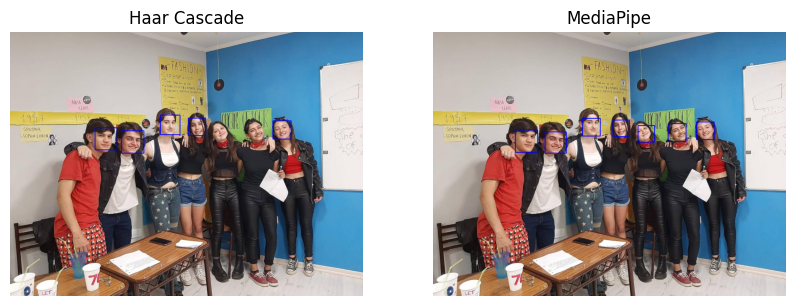

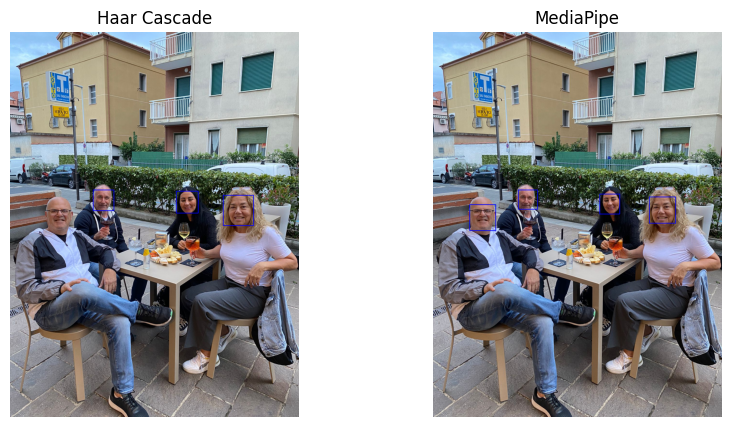

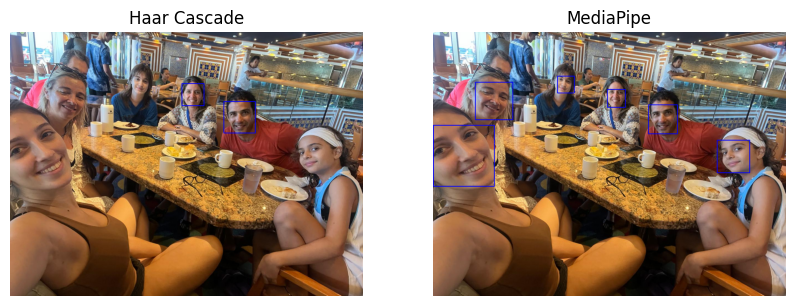

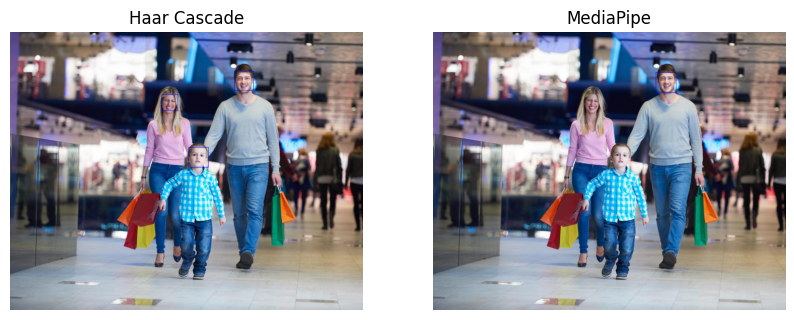

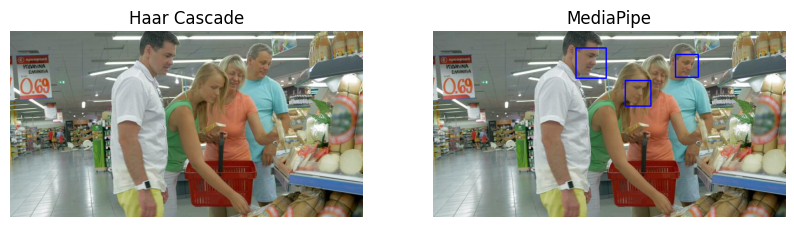

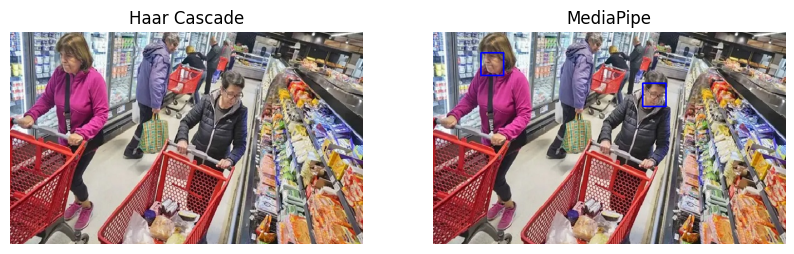

In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Función para detección de rostros con Haar Cascade
def detect_faces_haar(img_path, face_cascade):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    gray = cv2.equalizeHist(gray)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=70, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    return img

# Función para detección de rostros con MediaPipe
def detect_faces_mediapipe(img_path):
    mp_face_detection = mp.solutions.face_detection
    img = cv2.imread(img_path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.7) as face_detection:
        results = face_detection.process(rgb_img)
    if results.detections:
        for detection in results.detections:
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = img.shape
            x = int(bboxC.xmin * iw)
            y = int(bboxC.ymin * ih)
            w = int(bboxC.width * iw)
            h = int(bboxC.height * ih)
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    return img

# Lista de rutas de imágenes
image_paths = [
    'images\imagenes_MVP\WhatsApp Image 2024-10-21 at 21.17.38.jpeg',
    'images\imagenes_MVP\WhatsApp Image 2024-10-21 at 21.03.41.jpeg',
    'images\imagenes_MVP\WhatsApp Image 2024-10-21 at 20.48.43.jpeg',
    'images\imagenes_MVP\sweden-2022-family-in-shopping-mall-free-photo.jpg',
    r'images\imagenes_MVP\family-buying-cheese-in-the-store-video.jpg', 
    r"images\imagenes_MVP\71742-0-44.jpg"
]

# Carga Haar Cascade
face_cascade = cv2.CascadeClassifier('models/haarcascade_frontalface_default.xml')

# Procesa cada imagen y compara los resultados
for img_path in image_paths:
    # Detección con Haar Cascade
    haar_result = detect_faces_haar(img_path, face_cascade)
    
    # Detección con MediaPipe
    mediapipe_result = detect_faces_mediapipe(img_path)
    
    # Muestra los resultados lado a lado
    plt.figure(figsize=(10, 5))
    
    # Resultado Haar Cascade
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(haar_result, cv2.COLOR_BGR2RGB))
    plt.title("Haar Cascade")
    plt.axis("off")
    
    # Resultado MediaPipe
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(mediapipe_result, cv2.COLOR_BGR2RGB))
    plt.title("MediaPipe")
    plt.axis("off")
    
    # Muestra la comparación
    plt.show()


Primera imágen: Mediapipe detectó todos los rostros presentes, mientras que Haar Cascades no logró identificar dos rostros que estaban levemente rotados.

Segunda imágen: En una escena donde todos los rostros estaban más de costado, Haar Cascades no detectó ninguno, mientras que Mediapipe identificó 3 de los 4 rostros.

Tercera imágen: Con un total de seis rostros presentes, Haar Cascades solo detectó 2 rostros, mientras que Mediapipe logró identificar todos correctamente.

Cuarta imágen: En esta imagen, Haar Cascades detectó 2 de los 3 rostros, pero Mediapipe solo reconoció 1 rostro.

Quinta imágen: Mediapipe detectó todos los rostros (4 de 4), mientras que Haar Cascades identificó únicamente 3 de ellos.

Sexta imágen: Mediapipe identificó 2 de 3 rostros. Haar Cascades no detectó ninguno.


Me quedo con Mediapipe